In [25]:
# ----- DEEP LEARNING ---------

In [26]:
with open('common.py') as fin:
  msg = fin.read()
  exec(msg)

In [27]:
with open('matplotlibconf.py') as fin:
   exec(fin.read())

In [28]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))
def step(x):
    return x > 0

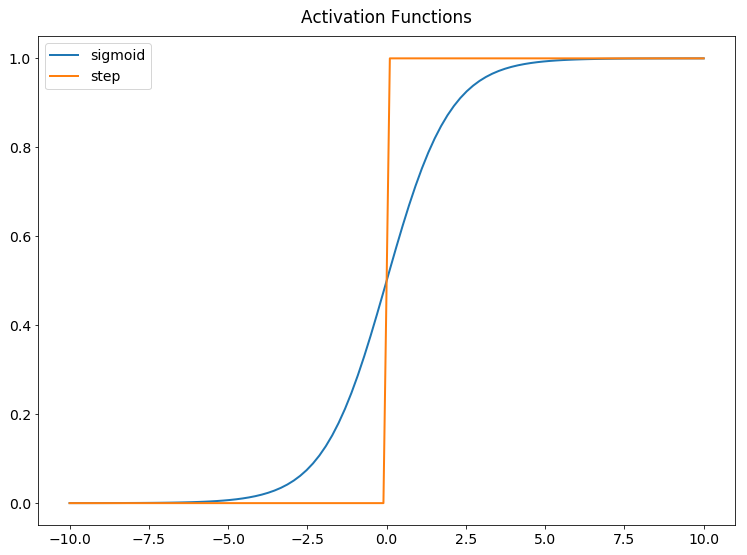

In [29]:
# -- Activation Function with Sigmoid and Step function --
x = np.linspace(-10, 10, 100)
plt.plot(x, sigmoid(x))
plt.plot(x, step(x))
plt.legend(['sigmoid', 'step'])
plt.title('Activation Functions');

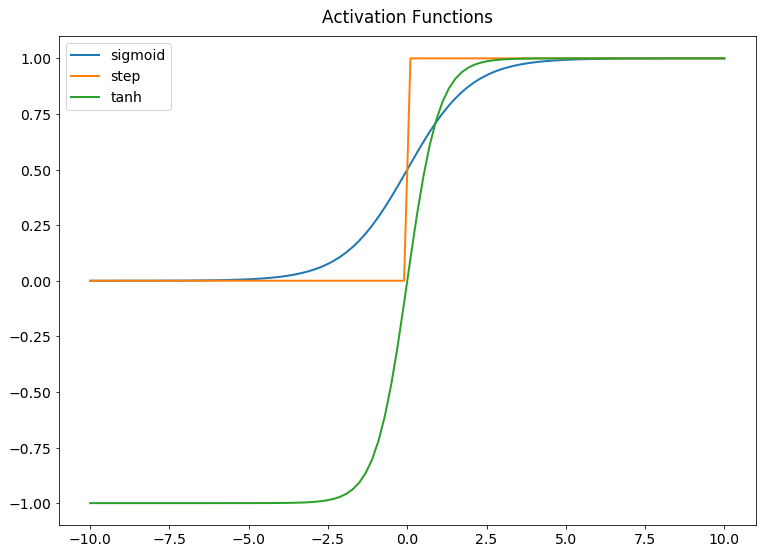

In [30]:
# -- [Activation Function] Sigmoid, Step, and Tanh funstions --
x = np.linspace(-10, 10, 100)
plt.plot(x, sigmoid(x))
plt.plot(x, step(x))
plt.plot(x, np.tanh(x))
plt.legend(['sigmoid', 'step', 'tanh'])
plt.title('Activation Functions');

In [31]:
# -- [Activation Function] The rectified linear unit function or simply rectifier --
def relu(x):
    cond = x > 0
    return cond * x

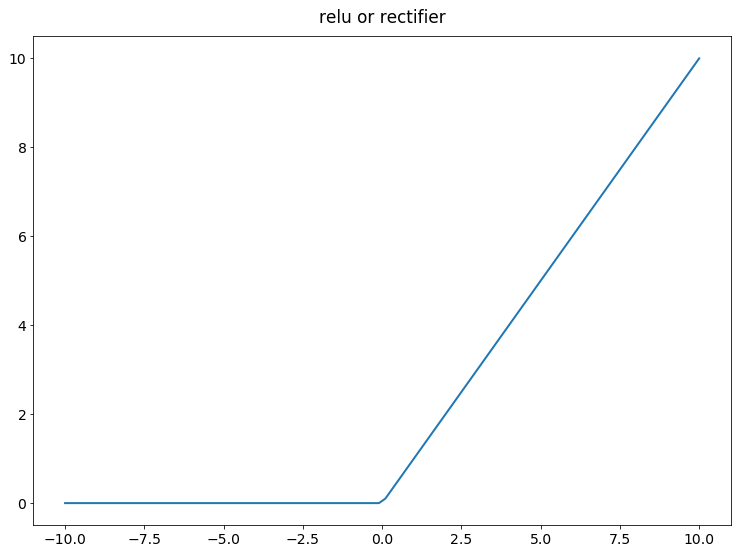

In [32]:
x = np.linspace(-10, 10, 100)
plt.plot(x, relu(x))
plt.title('relu or rectifier');

In [33]:
# -- [Activation Function] The Softplus function (rarely used) --
def softplus(x):
    return np.log1p(np.exp(x))

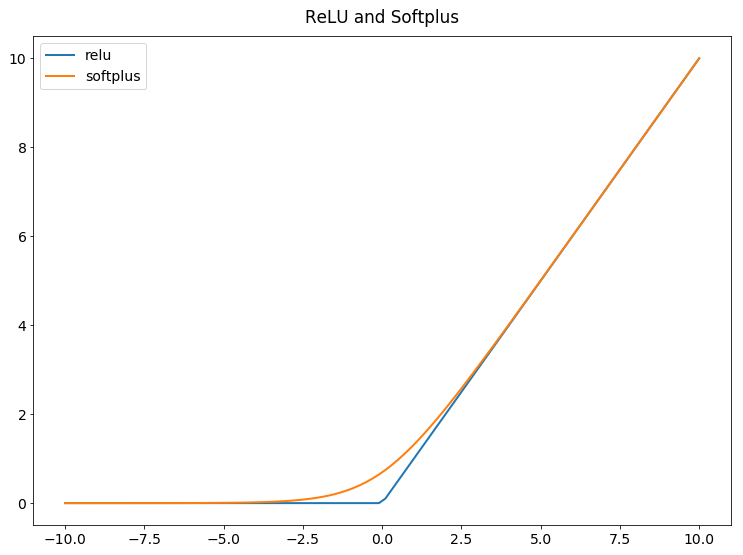

In [34]:
x = np.linspace(-10, 10, 100)
plt.plot(x, relu(x))
plt.plot(x, softplus(x))
plt.legend(['relu', 'softplus'])
plt.title('ReLU and Softplus');

In [35]:
# -- [Activation Function] SeLU (Scaled exponential linear unit ) --
def selu(x):
    alpha = 1.6732632423543772848170429916717
    scale = 1.0507009873554804934193349852946
    res = scale * np.where(x>0.0,
                x,
                alpha * (np.exp(x) - 1))
    return res

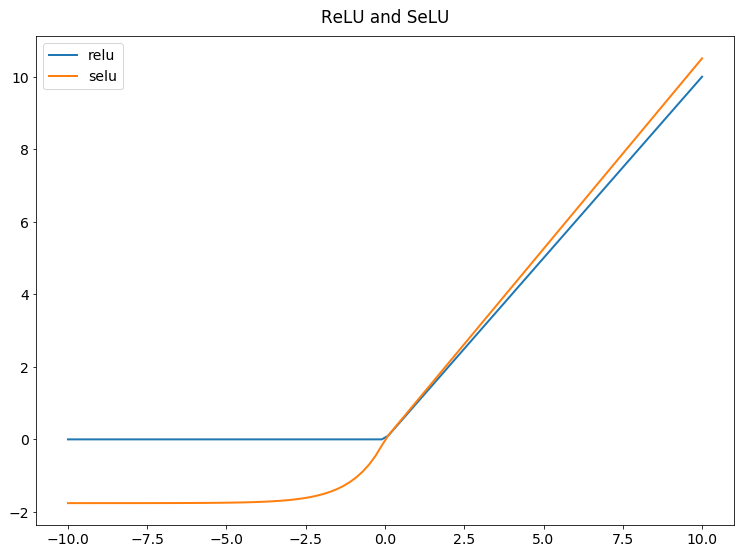

In [36]:
x = np.linspace(-10, 10, 100)
plt.plot(x, relu(x))
plt.plot(x, selu(x))
plt.legend(['relu', 'selu'])
plt.title('ReLU and SeLU');

In [37]:
# ----- Binary Classification ------
# ----- Using Scikit Learn  make_moons function
from sklearn.datasets import make_moons

In [38]:
X, y = make_moons(n_samples=20000,
                    noise=0.1,
                    random_state=0)

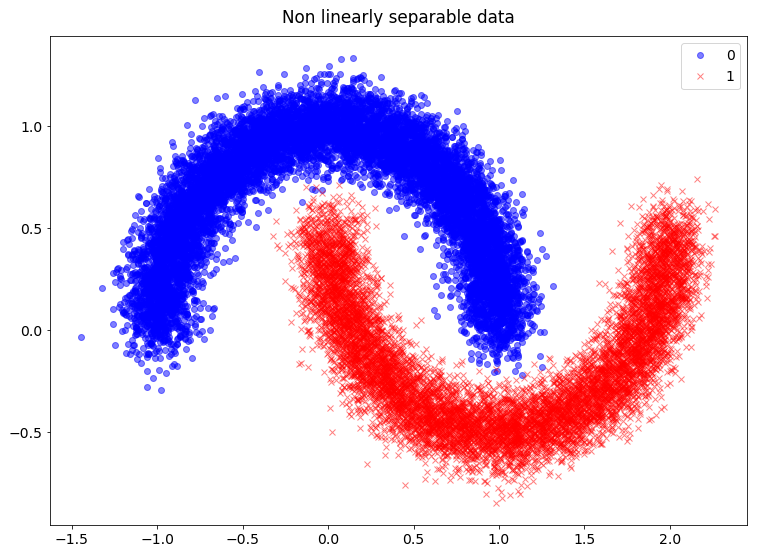

In [39]:
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.legend(['0', '1'])
plt.title('Non linearly separable data');

In [40]:
X.shape

(20000, 2)

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
# -- Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
X_train.shape

(14000, 2)

In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from time import time

tf.compat.v1.disable_eager_execution()

In [45]:
with tf.device('gpu:0'):
  model = Sequential()
# model = Sequential()

In [46]:
model.add(Dense(1, input_dim=2, activation='sigmoid'))

In [47]:
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [49]:
print("Training convolutional model:  GPU ...")
t0 = time()

model.fit(X_train, y_train, batch_size=1024, epochs=100, verbose=1)

print("{:0.3f} seconds.".format(time() - t0))

Training convolutional model:  GPU ...
Train on 14000 samples
Epoch 1/100
14000/14000 [==============================] - 0s 5us/sample - loss: 1.0818 - accuracy: 0.1946
Epoch 2/100
14000/14000 [==============================] - 0s 4us/sample - loss: 0.7058 - accuracy: 0.5153
Epoch 3/100
14000/14000 [==============================] - 0s 4us/sample - loss: 0.5002 - accuracy: 0.8245
Epoch 4/100
14000/14000 [==============================] - 0s 4us/sample - loss: 0.4079 - accuracy: 0.8241
Epoch 5/100
14000/14000 [==============================] - 0s 5us/sample - loss: 0.3647 - accuracy: 0.8285
Epoch 6/100
14000/14000 [==============================] - 0s 5us/sample - loss: 0.3402 - accuracy: 0.8340
Epoch 7/100
14000/14000 [==============================] - 0s 4us/sample - loss: 0.3240 - accuracy: 0.8407
Epoch 8/100
14000/14000 [==============================] - 0s 4us/sample - loss: 0.3115 - accuracy: 0.8474
Epoch 9/100
14000/14000 [==============================] - 0s 4us/sample - loss: 0

In [ ]:
results = model.evaluate(X_test, y_test)

In [ ]:
print("The Accuracy score on the Test set is:\t", "{:0.3f}".format(results[1]))

In [ ]:
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    cc = c.reshape(aa.shape)
    
    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])
    

In [ ]:
print("Plot decision boundary model: GPU ...")
t0 = time()

plot_decision_boundary(model, X, y)
plt.title("Decision Boundary for Logistic Regression")
print("{:0.3f} seconds.".format(time() - t0))

In [ ]:
# --- Deep model with 3 lyers ( 1st. layer with 4 nodes, 2 inputs, and a relu activation function )
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))

In [ ]:
model.add(Dense(2, activation='relu'))

In [ ]:
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
print("Training convolutional model: GPU ...")
t0 = time()
model.fit(X_train, y_train, epochs=100, verbose=0)
print("{:0.3f} seconds.".format(time() - t0))

In [ ]:
# -- predict classes
y_train_pred = model.predict_classes(X_train)
y_test_pred = model.predict_classes(X_test)

In [ ]:
# -- predict probability of each class
y_train_prob = model.predict(X_train)
y_test_prob = model.predict(X_test)

In [ ]:
y_train_pred[:3]

In [ ]:
y_train_prob[:3]

In [ ]:
# -- Compare predicted classes with actual classes
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
acc = accuracy_score(y_train, y_train_pred)
print("Accuracy (Train set):\t{:0.3f}".format(acc))
acc = accuracy_score(y_test, y_test_pred)
print("Accuracy (Test set):\t{:0.3f}".format(acc))

In [ ]:
print("Plot decision boundary for Fully Connected model: GPU ...")
t0 = time()

plot_decision_boundary(model, X, y)
plt.title("Decision Boundary for Fully Connected")
print("{:0.3f} seconds.".format(time() - t0))